
In the provided video footage, a black object is thrown against a wall. Your objective is to develop a Python script to detect and plot the pixel coordinates of the center point of this thrown object throughout the video. Follow the steps outlined below:


1) Read the video and extract individual frames using OpenCV. [15]

2) Loop over each frame to extract the pixels of moving object (Hint: Use color). [20]

3) Calculate the centroid of the object in every frame (doesn’t have to be very precise). [15]

4) Assume TOP LEFT corner of the frame as 0,0 and accordingly use ‘Standard Least Square’ to fit a curve (parabola)
through the found centroids in part 3. [20]

5) Given that x axis value is 1000, find the y axis value for calculated equation in part 4. [10]

6) Capture any one frame from the video (which shows the object) and plot the obtained equation. [20]


In [10]:
# import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

The first three steps are solved in the next cell which include reading the video and extracting individual frames and pixels, calculating the centroid of the object in every frame

In [11]:
cap = cv2.VideoCapture('/content/video.mp4')

x = [] # initialize lists for x and y coordinates
y = []

while cap.isOpened():
    ret, frame = cap.read() # read frame from video

    if not ret: # in case not read interrupt
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # BGR image to HSV
    mask = cv2.inRange(hsv, (0,0,0), (180,255,30)) # Putting thresholds for black color using mask (isolating black)


    y_coords, x_coords = np.where(mask > 0) #coordinates where the mask is not zero

    if len(y_coords) > 0 and len(x_coords) > 0: #in case coordinates found
        centroid_x = int(np.mean(x_coords))  #compute the average x-coordinate
        centroid_y = int(np.mean(y_coords))  #compute the average y-coordinate
        coordinates = (centroid_x, centroid_y)
        cv2.circle(frame, coordinates, 3, (0, 255, 0), -2) #draw a circle in the center

        x.append(coordinates[0])   # collect center points in x and y lists initialized before loop
        y.append(coordinates[1])

   # cv2_imshow(frame)

    if cv2.waitKey(5) & 0xFF == ord('q'): #break the loop
        break

cap.release()
cv2.destroyAllWindows()
# #print("Pixel coordinates of the moving object in each frame:")
# for frame_num, coordinates in enumerate(centroid_coordinates):
#     print("Frame", frame_num + 1, ":", coordinates)


‘Standard Least Square’ to fit a curve (parabola) through the found centroids

In [12]:
# Conversion to NumPy arrays for better handling
x = np.array(x)
y = np.array(y)

# Apply Standard Least Squares method to fit a parabolic path to the tracked coordinates
M = np.array([x**2, x, np.ones(len(x))]).T                  # a design matrix
coefficients = np.linalg.inv(M.T @ M) @ M.T @ y             # parabolic curve's coefficients using least squares
a, b, c = coefficients                                      # extract the solution for a b c in y = {a}x^2 + {b}x + {c}

# Construct and display the parabolic trajectory equation
equation = f"Equation of parabolic trajectory: y = {a}x^2 + {b}x + {c}"
print(equation)





Equation of parabolic trajectory: y = 0.0006476425225924483x^2 + -1.2418693086210888x + 992.2886782577352


Given that x axis value is 1000, find the y axis value for calculated equation in part 4.

In [13]:
x_1000 = 1000
y_1000 = a*(x_1000**2) + b*x_1000 + c
print(y_1000)

398.0618922290947


Capture any one frame from the video (which shows the object) and plot the obtained equation.

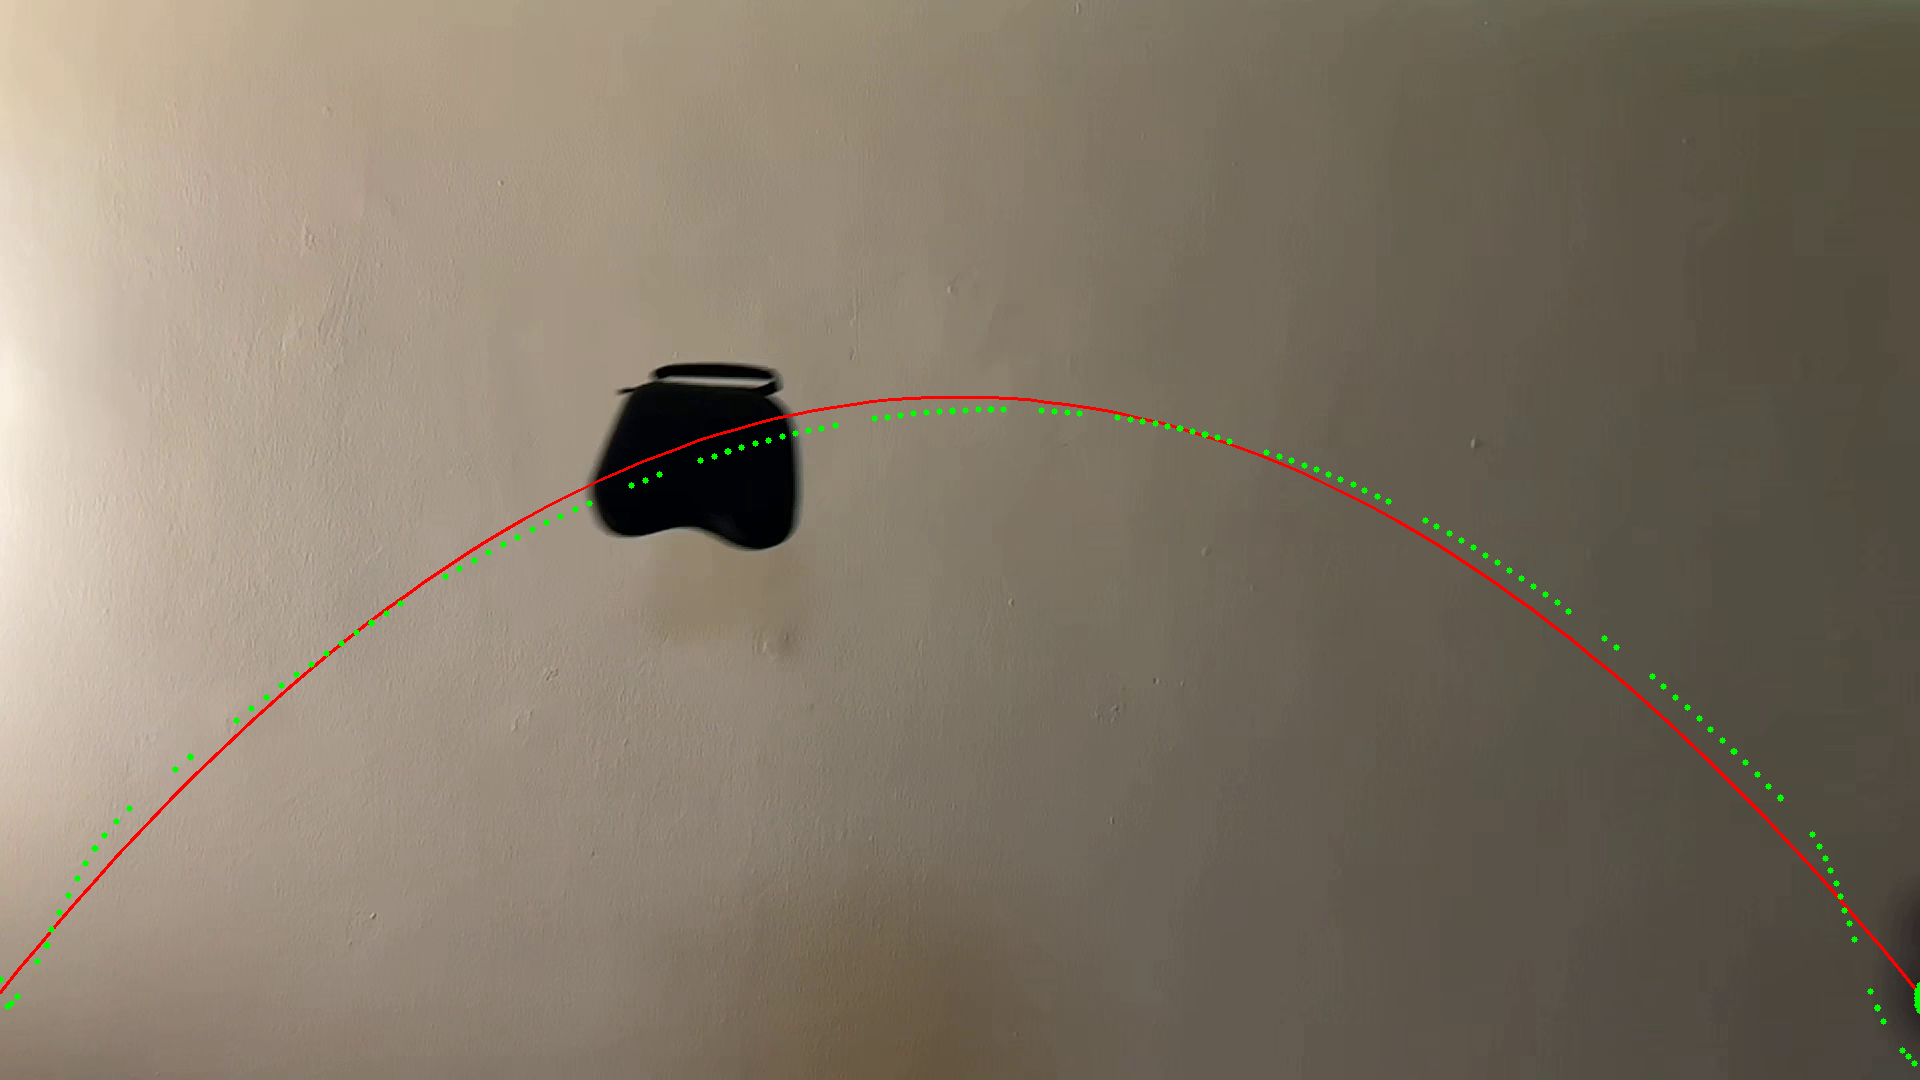

In [14]:
# Open the video
cap = cv2.VideoCapture('/content/video.mp4')

# Taking frame number 400 which has the moving object (since any frame can be selected)
frame_number = 400
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Capture the frame
ret, frame = cap.read()
if not ret:
    print("Unable to capture frame {} from the video.".format(frame_number))
else:
    # x range for plotting the parabola
    x_values = np.linspace(0, frame.shape[1], 100).astype(np.int32)
    # corresponding y values
    y_values = (a * x_values**2 + b * x_values + c).astype(np.int32)

    # points of x and y values for showing on the frame number 400 from the video
    points = np.vstack((x_values, y_values)).T

    # the parabolic trajectory on the frame
    cv2.polylines(frame, [points], False, (0, 0, 255), 2)
    #  centroids
    for (cx, cy) in zip(x, y):
        cv2.circle(frame, (cx, cy), 3, (0, 255, 0), -1)

    # display the frame with the trajectory
    cv2_imshow(frame)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

# release the video capture object
cap.release()

